In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [101]:
df = pd.read_csv('/content/marketing_campaign.csv',sep = '\t')

In [95]:
df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wine,Fruits,Meat,Fish,Sweets,...,NumWebVisitsMonth,Complain,Response,child,Family,Age,Spent,recent_cust,High_spend,High_Income
0,Graduate,1,0,0,58,635,88,546,172,88,...,7,0,1,0,1,68,1617,0,1,0
1,Graduate,1,1,1,38,11,1,6,2,1,...,5,0,0,2,3,71,27,1,0,0
2,Graduate,1,0,0,26,426,49,127,111,21,...,4,0,0,0,2,60,776,1,0,0
3,Graduate,0,1,0,26,11,4,20,10,3,...,6,0,0,1,3,41,53,1,0,0
4,Postgraduate,1,1,0,94,173,43,118,46,27,...,5,0,0,1,3,44,422,0,0,0


In [6]:
df.shape

(2240, 29)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [9]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [103]:
df.dropna(inplace=True)

In [48]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [104]:
df['Marital_Status'] = df['Marital_Status'].replace({'Widow':1,'Alone':1,'Absurd':1,'YOLO':1,'Single':1,'Together':2,'Married':2,'Divorced':1})

In [39]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,child,Family
0,5524,1957,Graduation,1,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,0,10
1,2174,1954,Graduation,1,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,2,12
2,4141,1965,Graduation,2,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,0,20
3,6182,1984,Graduation,2,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,1,21
4,5324,1981,PhD,2,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,1,21


In [105]:
df['child'] = df['Kidhome'] + df['Teenhome']

In [106]:
print(df[['Marital_Status', 'child']].head())
print(df[['Marital_Status', 'child']].dtypes)
df[['Marital_Status', 'child']].applymap(type)

   Marital_Status  child
0               1      0
1               1      2
2               2      0
3               2      1
4               2      1
Marital_Status    int64
child             int64
dtype: object


,Marital_Status,child
0,<class 'int'>,<class 'int'>
1,<class 'int'>,<class 'int'>
2,<class 'int'>,<class 'int'>
3,<class 'int'>,<class 'int'>
4,<class 'int'>,<class 'int'>
...,...,...
2235,<class 'int'>,<class 'int'>
2236,<class 'int'>,<class 'int'>
2237,<class 'int'>,<class 'int'>
2238,<class 'int'>,<class 'int'>


In [107]:
df['Family'] = df['Marital_Status'] + df['child']

In [71]:
df['Family']

,Family
0,1
1,3
2,2
3,3
4,3
...,...
2235,3
2236,5
2237,1
2238,3


In [108]:
import datetime
df['Age'] = (datetime.datetime.now().year - df['Year_Birth'])

In [55]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,child,Family,Age
0,5524,1957,Graduation,1,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,3,11,1,0,1,68
1,2174,1954,Graduation,1,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,3,11,0,2,3,71
2,4141,1965,Graduation,2,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,3,11,0,0,2,60
3,6182,1984,Graduation,2,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,3,11,0,1,3,41
4,5324,1981,PhD,2,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,3,11,0,1,3,44


In [73]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [109]:
df['Education'].replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate','Graduation':'Graduate','Master':'Postgraduate','PhD':'Postgraduate'},inplace=True)

In [110]:
df.rename(columns={'MntWines':'Wine','MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweets','MntGoldProds':'Gold'},inplace=True)

In [111]:
df.drop(columns = ['ID','Year_Birth',"Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue"],axis = 1,inplace=True)

In [77]:
df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wine,Fruits,Meat,Fish,Sweets,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,child,Family,Age
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,0,0,0,1,0,1,68
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,0,0,0,2,3,71
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,0,0,0,0,2,60
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,0,0,0,1,3,41
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,0,0,0,0,1,3,44


In [112]:
df['Spent'] = df['Wine'] + df['Fruits'] + df['Meat'] + df['Fish'] + df['Sweets'] + df['Gold']

In [113]:
df.drop(columns = ['AcceptedCmp3','AcceptedCmp4','AcceptedCmp1','AcceptedCmp5','AcceptedCmp2','Response','Complain'],axis = 1,inplace=True)


In [114]:
df.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wine',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'child', 'Family', 'Age', 'Spent'],
      dtype='object')

In [115]:
df['Spent'].sort_values(ascending=False)

,Spent
1572,2525
1179,2525
1492,2524
987,2486
1052,2440
...,...
1420,8
2129,8
655,6
981,6


In [116]:
df['Income'].sort_values(ascending=False)

,Income
2233,666666.0
617,162397.0
687,160803.0
1300,157733.0
164,157243.0
...,...
1975,4428.0
1846,4023.0
1524,3502.0
21,2447.0


In [117]:
df['Recency']

,Recency
0,58
1,38
2,26
3,26
4,94
...,...
2235,46
2236,56
2237,91
2238,8


In [118]:
df['recent_cust'] = df['Recency'].apply(lambda x: 1 if x <= 50 else 0)

In [119]:
df['High_spend'] = df['Spent'].apply(lambda x: 1 if x > 1000 else 0)

In [120]:
df['High_Income'] = df['Income'].apply(lambda x: 1 if x > 30000 else 0)

In [121]:
df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wine,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,child,Family,Age,Spent,recent_cust,High_spend,High_Income
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,10,4,7,0,1,68,1617,0,1,1
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,1,2,5,2,3,71,27,1,0,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,2,10,4,0,2,60,776,1,0,1
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,4,6,1,3,41,53,1,0,0
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,3,6,5,1,3,44,422,0,0,1


In [165]:
df_clean = clust_df.copy()

for col in clust_df.columns:
    Q1 = clust_df[col].quantile(0.25)
    Q3 = clust_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Keep only rows where current column is within bounds
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

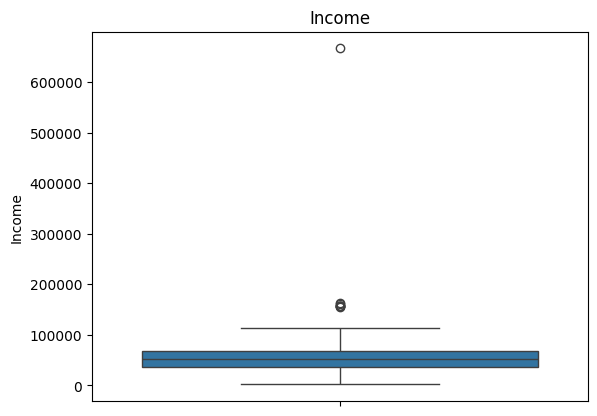

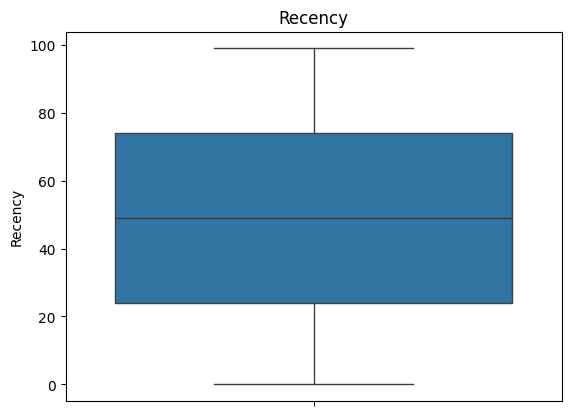

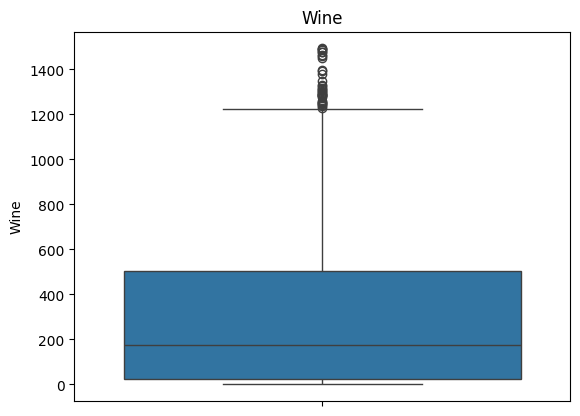

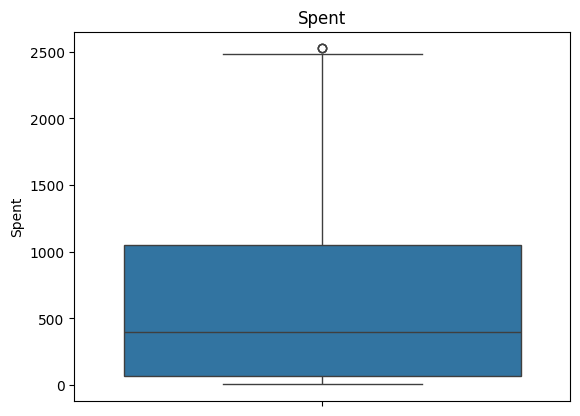

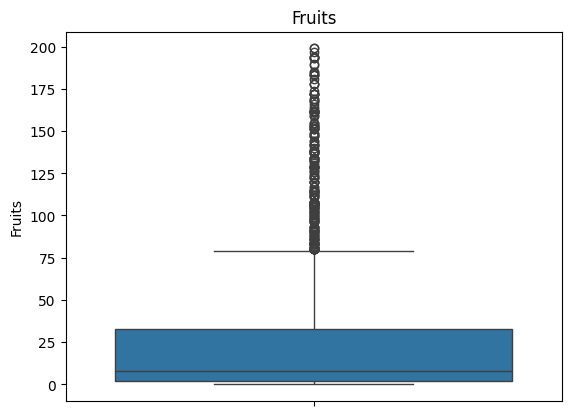

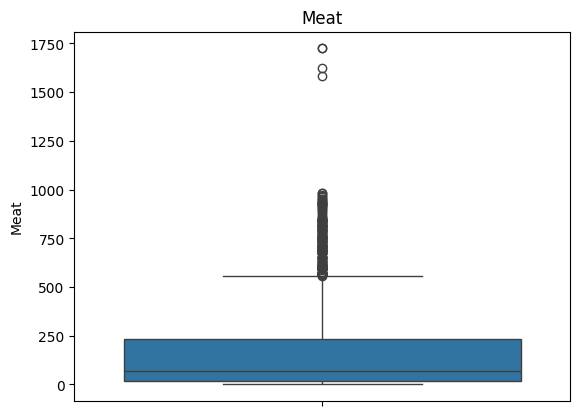

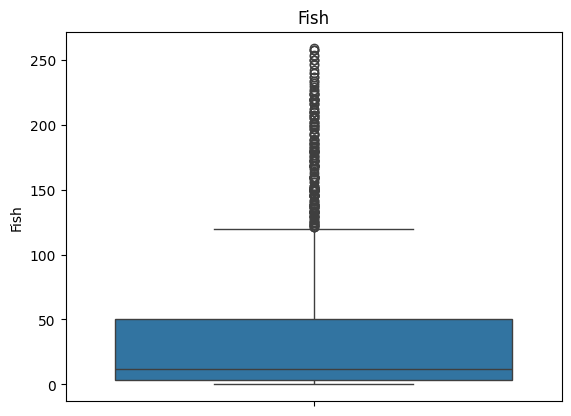

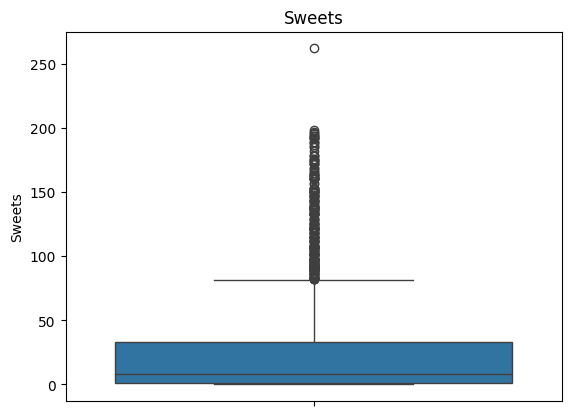

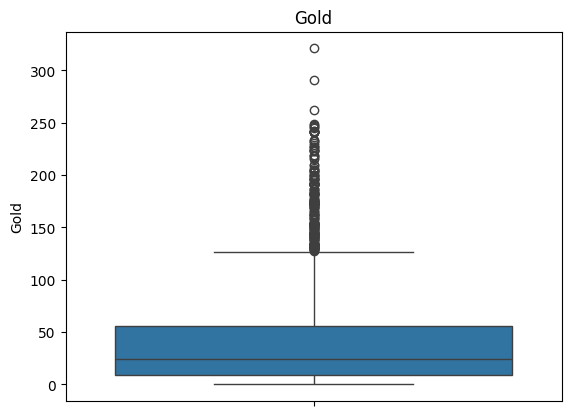

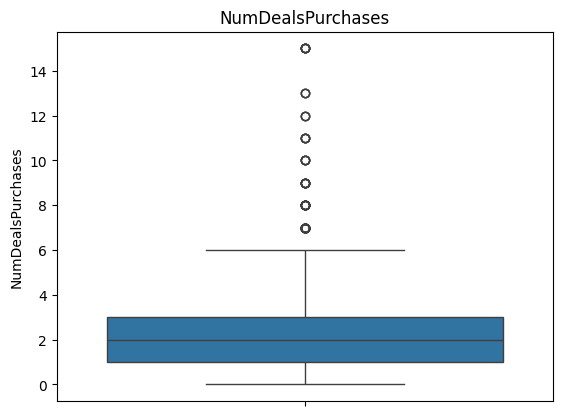

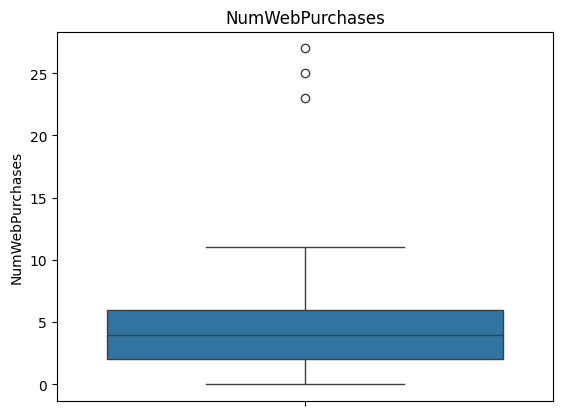

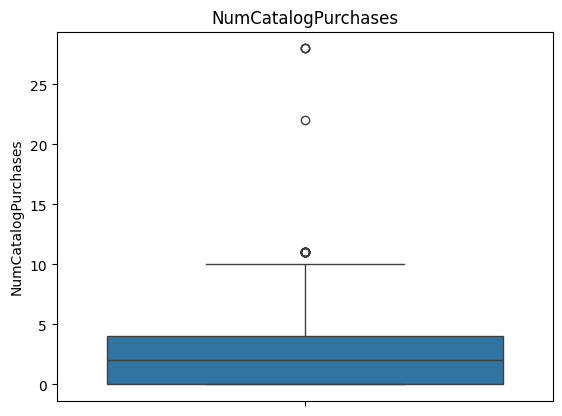

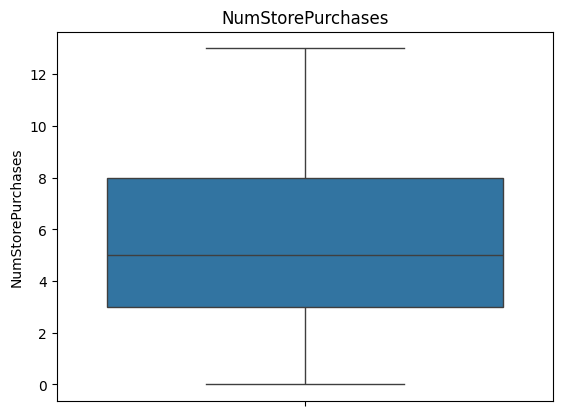

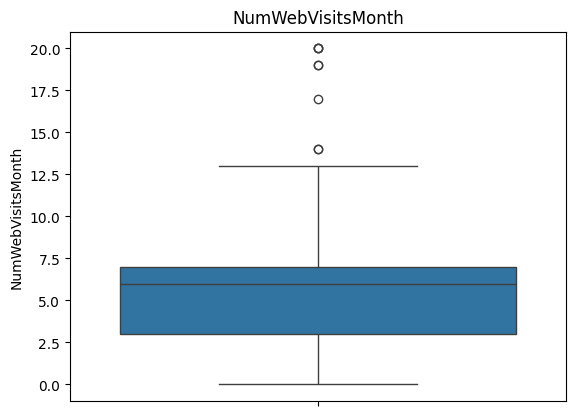

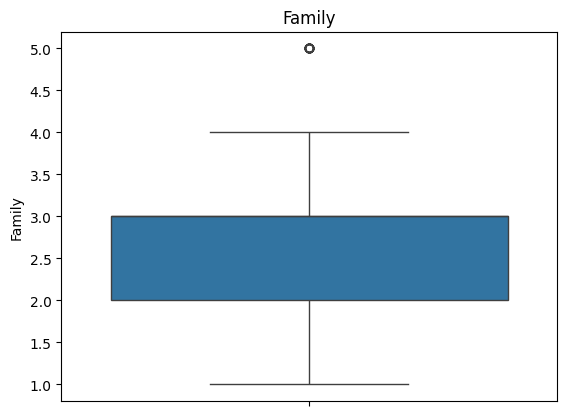

In [166]:
for col in clust_df.columns:
  sns.boxplot(clust_df[col])
  plt.title(col)
  plt.show()

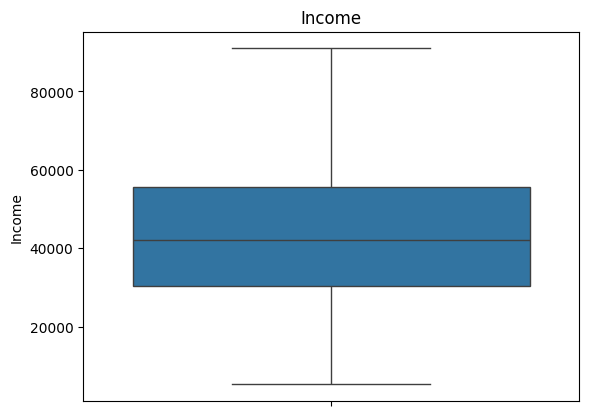

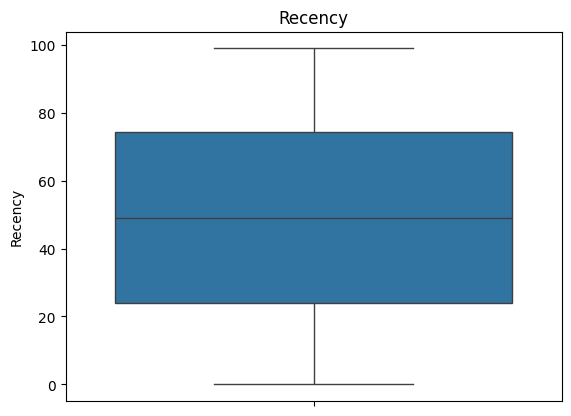

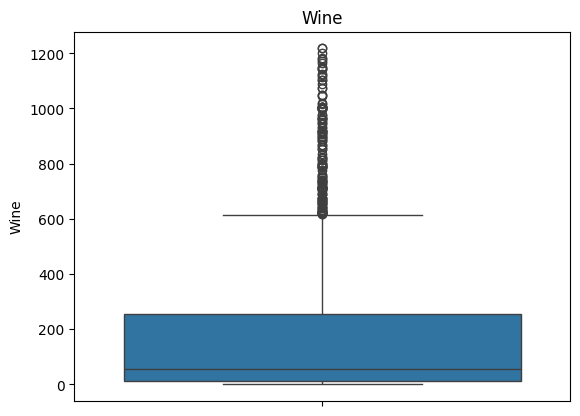

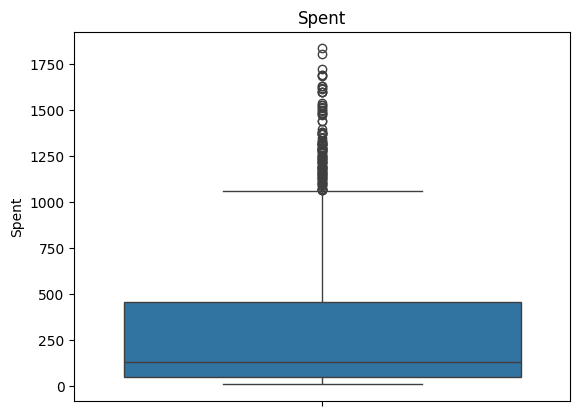

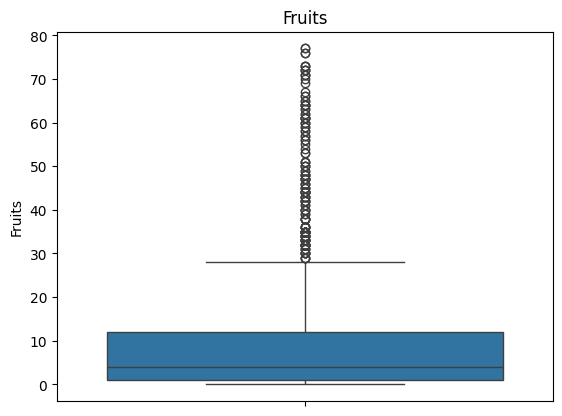

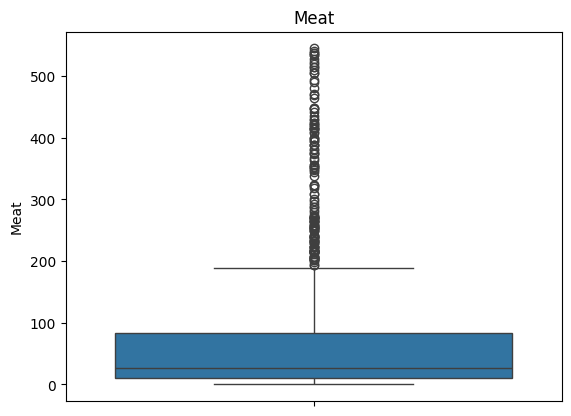

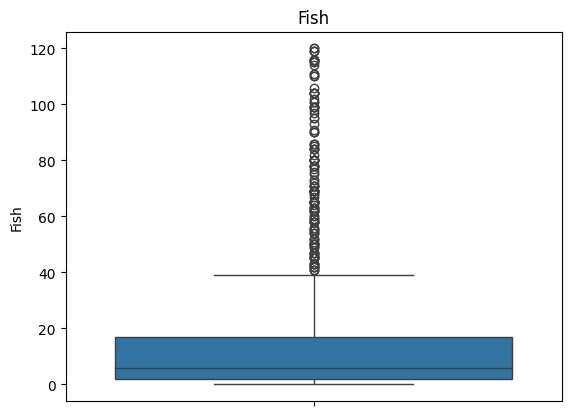

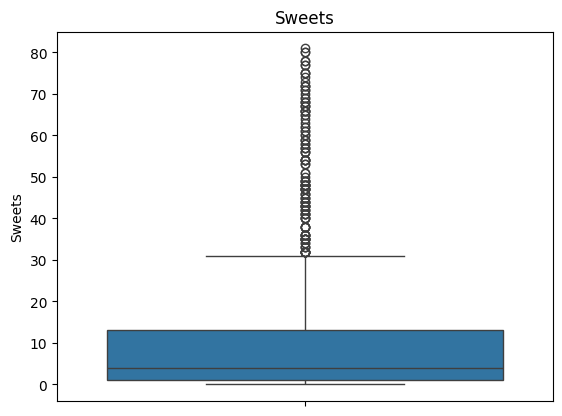

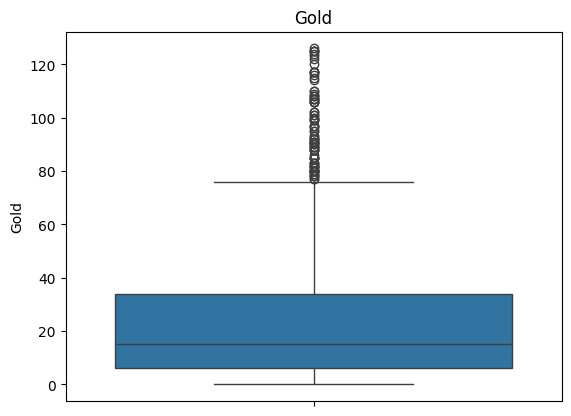

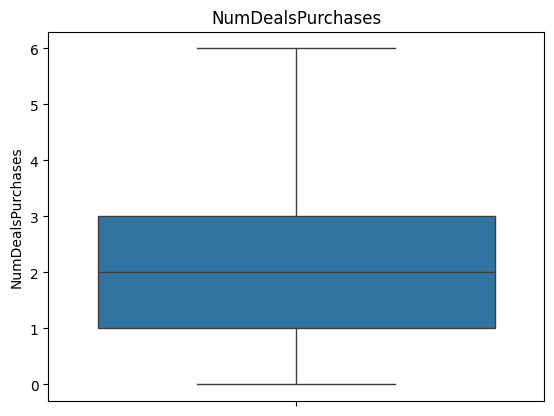

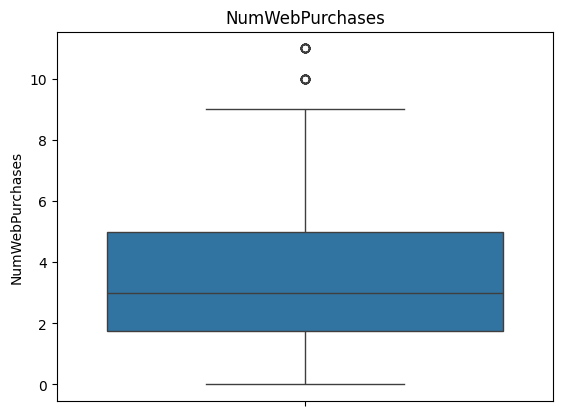

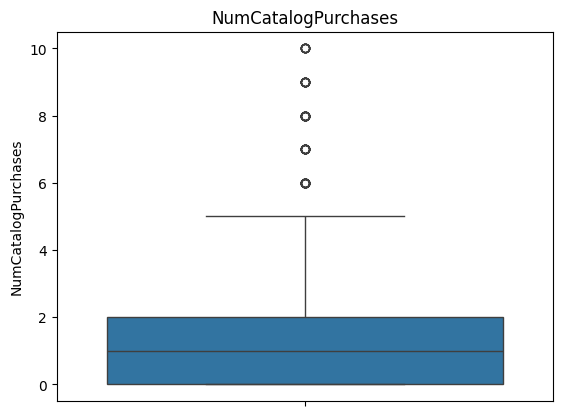

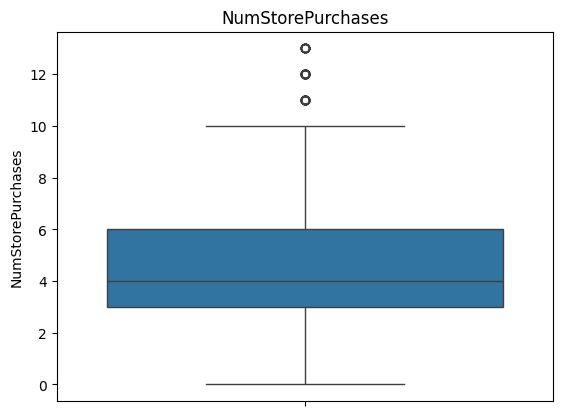

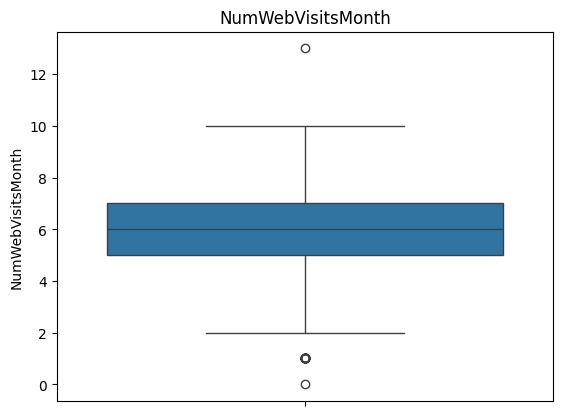

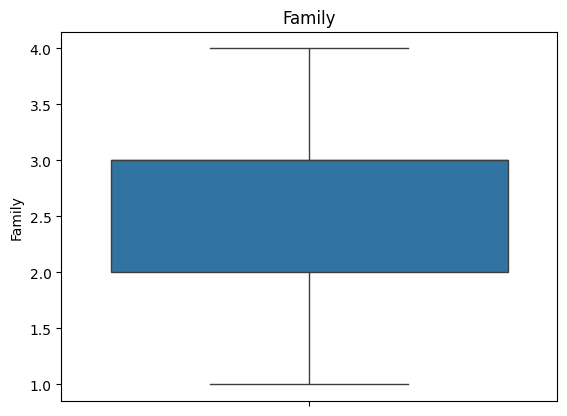

In [167]:
for col in df_clean.columns:
  sns.boxplot(df_clean[col])
  plt.title(col)
  plt.show()

In [168]:
df_clean

,Income,Recency,Wine,Spent,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Family
1,46344.0,38,11,27,1,6,2,1,6,2,1,1,2,5,3
2,71613.0,26,426,776,49,127,111,21,42,1,8,2,10,4,2
3,26646.0,26,11,53,4,20,10,3,5,2,2,0,4,6,3
4,58293.0,94,173,422,43,118,46,27,15,5,5,3,6,5,3
5,62513.0,16,520,716,42,98,0,42,14,2,6,4,10,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,26816.0,50,5,22,1,6,3,4,3,1,0,0,3,4,1
2234,34421.0,81,3,30,3,7,6,2,9,1,1,0,2,7,3
2237,56981.0,91,908,1241,48,217,32,12,24,1,2,3,13,6,1
2238,69245.0,8,428,843,30,214,80,30,61,2,6,5,10,3,3


In [169]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_clean)

In [227]:
scaled_df = pd.DataFrame(scaled_df, columns=['Income', 'Recency', 'Wine','Spent', 'Fruits', 'Meat','Fish', 'Sweets','Gold','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases', 'NumWebVisitsMonth', 'Family'])

In [172]:
clust_df = df[['Income', 'Recency', 'Wine', 'Spent','Fruits', 'Meat','Fish', 'Sweets','Gold','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases', 'NumWebVisitsMonth', 'Family']]

In [200]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(scaled_df)

KMeans(n_clusters=4)

In [178]:
from sklearn.metrics import silhouette_score
labels = kmeans.labels_
score = silhouette_score(scaled_df, labels)
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.123


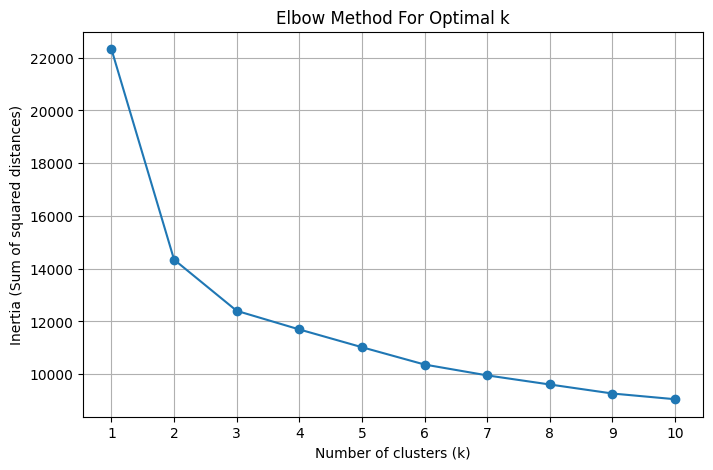

In [179]:
k_range = range(1, 11)

inertia_values = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia_values.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia_values, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [194]:
kmeans1 = KMeans(n_clusters=2)
kmeans1.fit(scaled_df)

KMeans(n_clusters=2)

In [195]:
kmeans2 = KMeans(n_clusters = 3)
kmeans2.fit(scaled_df)

KMeans(n_clusters=3)

In [236]:
scaled_df['labels2'] = kmeans1.labels_
scaled_df['labels3'] = kmeans2.labels_
scaled_df['labels4'] = kmeans.labels_

In [249]:
from sklearn.metrics import silhouette_score
labels1 = kmeans1.labels_
score = silhouette_score(scaled_df, labels1)
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.456


In [202]:
def profile_clusters(scaled_df, cluster_col):
    features = ['Income', 'Recency', 'Wine', 'Spent','Fruits', 'Meat','Fish', 'Sweets','Gold','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases', 'NumWebVisitsMonth', 'Family']
    profile = scaled_df.groupby(cluster_col)[features].mean()
    print(profile)
    return profile

# Profile and print clusters
profile_2 = profile_clusters(scaled_df, 'labels2')
profile_3 = profile_clusters(scaled_df, 'labels3')
profile_4 = profile_clusters(scaled_df, 'labels4')


           Income   Recency      Wine     Spent    Fruits      Meat      Fish  \
labels2                                                                         
0        1.144482  0.032025  1.248035  1.364354  0.951091  1.154962  0.958748   
1       -0.435285 -0.012180 -0.474670 -0.518910 -0.361732 -0.439271 -0.364644   

           Sweets      Gold  NumDealsPurchases  NumWebPurchases  \
labels2                                                           
0        0.952457  0.846205           0.208536         1.017636   
1       -0.362252 -0.321840          -0.079313        -0.387041   

         NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth    Family  
labels2                                                                       
0                   1.178516           1.261731          -0.628163 -0.364726  
1                  -0.448229          -0.479879           0.238912  0.138718  
           Income   Recency      Wine     Spent    Fruits      Meat      Fish  \
labels3  

In [205]:
import plotly.express as px
fig = px.scatter(scaled_df,x=scaled_df['Income'], y=scaled_df['Recency'], color=kmeans.labels_)
fig.show()

Group 1: Customers with high income and more number of recent visits. These customers are loyal and likely to make higher purchase.(color = Yellow)                                       
Group 2: Customers with moderately high income and less number of recent visits. These customers are budget friendly. (color = blue)   
Group 3: Customers with low income but visit the store more frequently. Customers are likely to be overspender. (color = Violet)            
Group 4: Customers with lower income and less number of visits in store. Customers will not be able to make luxurious purchases from store. (color = orange)

In [207]:
fig = px.scatter(scaled_df,x=scaled_df['Income'], y=scaled_df['Recency'], color=kmeans1.labels_)
fig.show()

Cluster 0 : High income (+1.14), high spend on Wine, Meat, Fruits, Sweets, Gold, lots of purchases (positive values), fewer web visits (-0.62), smaller family (-0.36)                             
**High-Value Loyalists / Premium Customers**                      

Cluster 1: Lower income (-0.43), low spend in all categories, fewer deals/web purchases (negative), more web visits (+0.23), slightly larger family (+0.13)                        
**Budget or Low Spend Customers**







In [218]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=2)
labels_agglo = agglo.fit_predict(scaled_df)

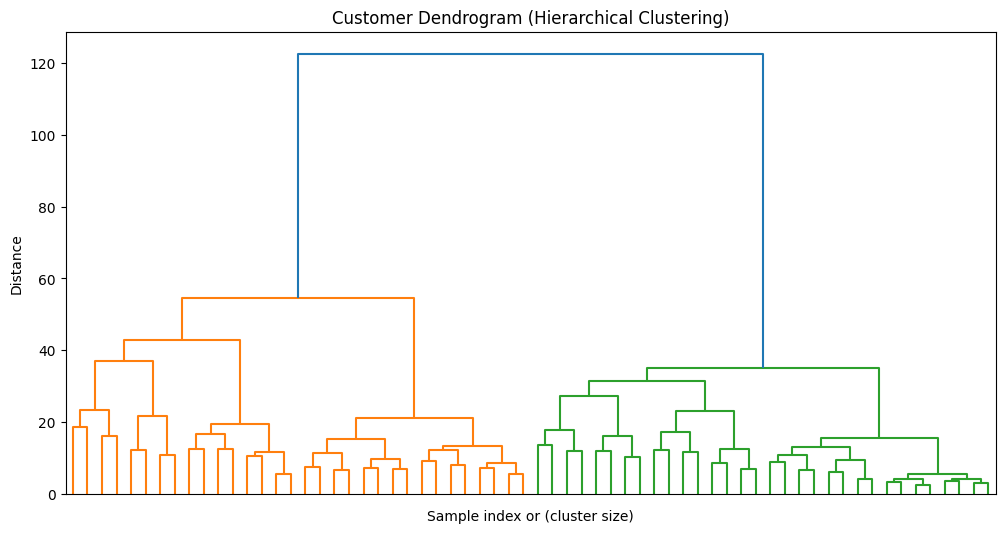

In [220]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(scaled_df, method='ward')  # 'ward' minimizes variance within clusters

# Step 3: Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False,
           truncate_mode='level',  # only show top levels
           p=5  # change this for more/less levels
          )
plt.title('Customer Dendrogram (Hierarchical Clustering)')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.show()

This shows n_clusters = 2 is optimum for clustering

In [240]:
aglo_labels = agglo.labels_
scaled_df['labels_agglo'] = aglo_labels

In [222]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)  # tune these values
labels_dbscan = dbscan.fit_predict(scaled_df)

In [235]:
scaled_df['cluster_dbscan'] = labels_dbscan

# 4. Count of clusters and noise
n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
n_noise = list(labels_dbscan).count(-1)
print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")

Estimated number of clusters: 3
Estimated number of noise points: 619


In [192]:
scaled_df

,Income,Recency,Wine,Spent,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Family
0,0.174354,-0.379249,-0.667727,-0.762967,-0.613983,-0.636288,-0.567440,-0.604179,-0.706584,-0.191092,-0.975618,-0.255506,-1.003045,-0.481021,0.310768
1,1.644616,-0.792117,0.891230,1.202864,2.660593,0.575102,4.181244,0.698180,0.699759,-0.925833,1.899074,0.263883,1.876205,-0.992277,-0.942411
2,-0.971762,-0.792117,-0.667727,-0.694727,-0.409322,-0.496127,-0.218913,-0.473943,-0.745650,-0.191092,-0.564948,-0.774896,-0.283233,0.030236,0.310768
3,0.869600,1.547471,-0.059170,0.273753,2.251271,0.484999,1.349460,1.088887,-0.354999,2.013132,0.667063,0.783273,0.436580,-0.481021,0.310768
4,1.115138,-1.136175,1.244343,1.045388,2.183051,0.284769,-0.654572,2.065656,-0.394064,-0.191092,1.077734,1.302662,1.876205,0.030236,0.310768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483,-0.961870,0.033620,-0.690266,-0.776090,-0.613983,-0.636288,-0.523874,-0.408825,-0.823780,-0.925833,-1.386288,-0.774896,-0.643139,-0.992277,-2.195590
1484,-0.519378,1.100197,-0.697779,-0.755093,-0.477542,-0.626276,-0.393176,-0.539061,-0.589389,-0.925833,-0.975618,-0.774896,-1.003045,0.541492,0.310768
1485,0.793262,1.444254,2.701873,2.423307,2.592373,1.476136,0.739537,0.112118,-0.003413,-0.925833,-0.564948,0.783273,2.955923,0.030236,-2.195590
1486,1.506835,-1.411420,0.898743,1.378713,1.364407,1.446101,2.830701,1.284241,1.441995,-0.191092,1.077734,1.822052,1.876205,-1.503533,0.310768


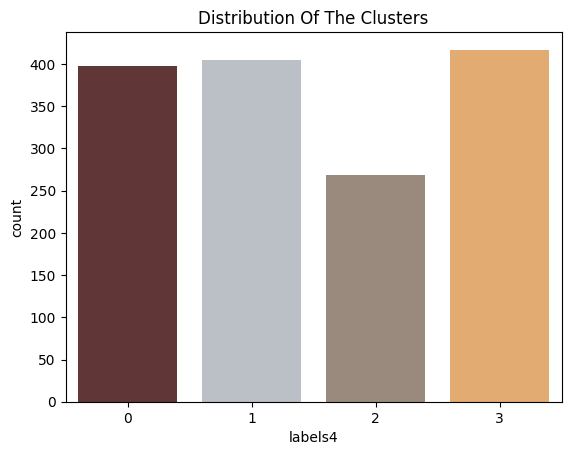

In [206]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=scaled_df["labels4"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

More no of people are likely to be our premium buyers.i.e. Most loyal.

In [231]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_df =pca.fit_transform(scaled_df)

In [233]:
scaled_df['pca1'] = pca_df[:, 0]
scaled_df['pca2'] = pca_df[:, 1]
scaled_df['pca3'] = pca_df[:, 2]


In [241]:
px.scatter_3d(scaled_df, x='pca1', y='pca2', z='pca3', color='labels2')

In [242]:
px.scatter_3d(scaled_df, x='pca1', y='pca2', z='pca3', color='labels3')

In [243]:
px.scatter_3d(scaled_df, x='pca1', y='pca2', z='pca3', color='labels4')

In [245]:
px.scatter_3d(scaled_df, x='pca1', y='pca2', z='pca3', color='labels_agglo')

In [248]:
px.scatter_3d(scaled_df, x='pca1', y='pca2', z='pca3', color='cluster_dbscan')

Dbscan has not performed well here. While Kmeans and Heirarchical clustering have performed pretty well.

The clustering analysis successfully segmented customers into meaningful groups based on behavioral and demographic features. KMeans with k=3 offered the best tradeoff between silhouette score and business interpretability, identifying premium, mid-tier, and low-value customers. These insights can drive targeted marketing strategies, retention efforts, and personalized offerings to improve customer engagement and lifetime value.